In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import sys
sys.path.append("../")

from python.model_check import ModelCheck

In [2]:
model_check = ModelCheck()

In [3]:
file_stem = "output/icecube_tests/"
file_list = [file_stem+"fit_sim_icecube_1000_singlesource_newprior.h5",
             file_stem+"fit_sim_icecube_9900_singlesource_newprior.h5"]
#file_list = [file_stem+"fit_sim_42_test.h5"]

model_check.load(file_list)

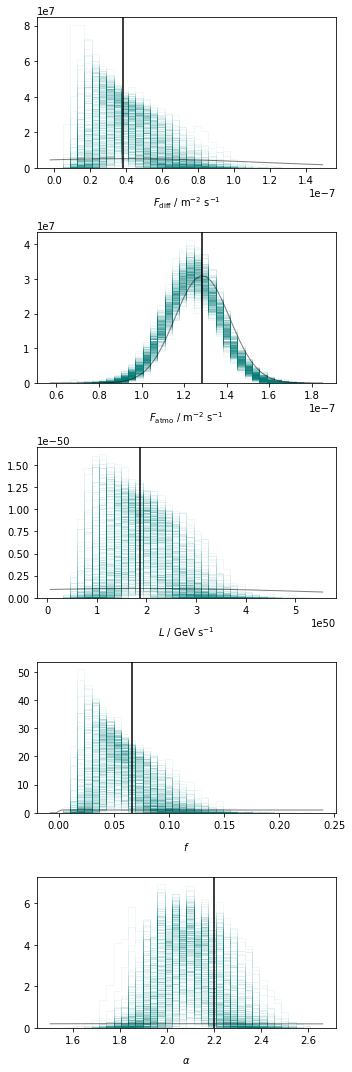

In [4]:
fig, ax = model_check.compare(show_prior=True)

In [5]:
#plt.style.use("minimalist")

In [6]:
#fig.savefig("figures/catalog_sim_study.pdf", dpi=500, bbox_inches="tight")

## Compare different detector models

In [7]:
import h5py

In [8]:
with h5py.File("../output/icecube_test.h5", "r") as f:
    f_ic = f["fit/outputs/f"][()]
    alpha_ic = f["fit/outputs/alpha"][()] 
    
with h5py.File("../output/cascades_test.h5", "r") as f:
    f_c = f["fit/outputs/f"][()]
    alpha_c = f["fit/outputs/alpha"][()] 
    
with h5py.File("../output/northern_tracks_test.h5", "r") as f:
    f_t = f["fit/outputs/f"][()]
    alpha_t = f["fit/outputs/alpha"][()]    

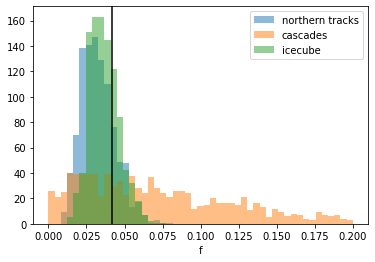

In [10]:
# Associated fraction
bins = np.linspace(0, 0.2)
fig, ax = plt.subplots()
ax.hist(f_t, bins=bins, alpha=0.5, label="northern tracks")
ax.hist(f_c, bins=bins, alpha=0.5, label="cascades")
ax.hist(f_ic, bins=bins, alpha=0.5, label="icecube")
ax.legend()
ax.axvline(0.04172, color='k')
ax.set_xlabel("f")
fig.savefig("figures/compare_dm_f.pdf", dpi=500, bbox_inches='tight')

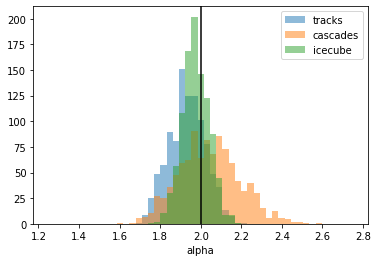

In [11]:
# Spectral index
bins = np.linspace(1.25, 2.75)
fig, ax = plt.subplots()
ax.hist(alpha_t, bins=bins, alpha=0.5, label="tracks")
ax.hist(alpha_c, bins=bins, alpha=0.5, label="cascades");
ax.hist(alpha_ic, bins=bins, alpha=0.5, label="icecube")
ax.legend()
ax.axvline(2.0, color='k')
ax.set_xlabel("alpha")
fig.savefig("figures/compare_dm_alpha.pdf", dpi=500, bbox_inches='tight')